# SQL Task 

In [3]:
# Importing the required libraries

import sqlite3
import pandas as pd

In [4]:
# Read the code below and write your observation in the next cell

conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


### Read the code above. Write observations here, i.e. what the code is trying to do..


In [6]:
# Reading the data from database and storing it in the dataframe

df = pd.read_sql_query("""SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


## Q_sample: Who is getting the maximum salary?

In [158]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(TotalPay) FROM Salaries""", conn)
output

,MAX(TotalPay)
0,567595.43


In [29]:
# Pandas Implementation - 1

max(df.TotalPay)

567595.43

In [32]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.TotalPay == max(df.TotalPay), ['TotalPay']]

,TotalPay
0,567595.43


<h3>
If you observe the above output, it is giving the maximum salary. 

Inorder to understand who is getting the maximum salary look at the next cell. 

Also try to map Pandas .loc syntax with the SQL SELECT Query.
</h3>

In [26]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * 
                            FROM Salaries 
                            WHERE TotalPay = (SELECT MAX(TotalPay) FROM Salaries)""", conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,


In [33]:
# Pandas Implementation

df.loc[df.TotalPay == max(df.TotalPay)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,


## Now try and answer below mentioned questions using SQL and equivalent Pandas Queries:

1. Retrieve the top 8 rows from the table.
2. What is the average TotalPay?
3. What is the highest amount of BasePay in the dataset?
4. What is the Job title of 'NATHANIEL FORD'?
5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?
6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)
7. How many unique jobs are there?
8. What are the top 5 most common jobs?
9. How many people have the word Chief in their job title?



Reference - https://www.sqlitetutorial.net

##### Q1.Retrieve the top 8 rows from the table

In [181]:
output = pd.read_sql_query("""SELECT * FROM Salaries LIMIT 8""", conn)
output


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [182]:
df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


#### Q2. What is the average TotalPay?

In [184]:
output = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries""", conn)
output

,AVG(TotalPay)
0,74768.321972


In [227]:
df['TotalPay'].mean()

74768.321971703

#### Q3. What is the highest amount of BasePay in the dataset?

In [187]:
output=pd.read_sql_query("""Select max(BasePay) FROM Salaries """,conn)

output

,max(BasePay)
0,Not Provided


In [191]:
output=pd.read_sql_query("""select  max(BasePay) from Salaries Where BasePay !='Not Provided' and BasePay!='' """,conn)
output

,max(BasePay)
0,319275.01


In [188]:
data_frame=pd.read_sql_query("""Select BasePay FROM Salaries """,conn)


In [189]:
import re

In [190]:
l2=[]
for i in data_frame['BasePay']:
    a=(re.findall(r"[-+]?\d*\.\d+|\d+",str(i)))
    if (a):
        l2.append(float(a[0]))
max(l2)

319275.01

#### Q4.What is the Job title of 'NATHANIEL FORD'?

In [192]:
output=pd.read_sql_query("""SELECT  JobTitle FROM Salaries WHERE EmployeeName='NATHANIEL FORD' """, conn)
output

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [203]:
df.loc[df['EmployeeName']=='NATHANIEL FORD',['JobTitle']]



,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


#### Q5.How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?

In [204]:
output=pd.read_sql_query("""SELECT  TotalPayBenefits FROM Salaries WHERE EmployeeName='NATHANIEL FORD' """, conn)
output

,TotalPayBenefits
0,567595.43


In [205]:
df.loc[df['EmployeeName']=='NATHANIEL FORD',['TotalPayBenefits']]

,TotalPayBenefits
0,567595.43


#### Q6.What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)

In [19]:
output=pd.read_sql_query(""" select AVG(Totalpay) from Salaries group by year""",conn)
output

,AVG(Totalpay)
0,71744.103871
1,74113.262265
2,77611.443142
3,75463.918140


In [21]:
(df['TotalPay'][df['Year']==2011]).mean()

71744.10387123664

In [22]:
(df['TotalPay'][df['Year']==2012]).mean()

74113.26226513737

In [23]:
(df['TotalPay'][df['Year']==2013]).mean()

77611.44314205405

In [24]:
(df['TotalPay'][df['Year']==2014]).mean()

75463.91814023

#### Q7.How many unique jobs are there?

In [215]:
output= pd.read_sql_query(""" SELECT JobTitle FROM Salaries GROUP BY JobTitle;""", conn)
output

,JobTitle
0,ACCOUNT CLERK
1,ACCOUNTANT
2,ACCOUNTANT INTERN
3,"ACPO,JuvP, Juv Prob (SFERS)"
4,ACUPUNCTURIST
...,...
2154,X-RAY LABORATORY AIDE
2155,X-Ray Laboratory Aide
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"
2157,Youth Comm Advisor


In [216]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

#### Q8. What are the top 5 most common jobs?

In [219]:
output= pd.read_sql_query("""SELECT JobTitle FROM Salaries GROUP BY (JobTitle) ORDER BY COUNT(JobTitle) DESC LIMIT 5""",conn);
output

,JobTitle
0,Transit Operator
1,Special Nurse
2,Registered Nurse
3,Public Svc Aide-Public Works
4,Police Officer 3


In [218]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

#### Q9.How many people have the word Chief in their job title?

In [220]:
output= pd.read_sql_query("""SELECT COUNT(JobTitle) FROM Salaries WHERE JobTitle LIKE '%Chief%'""",conn);
output

,COUNT(JobTitle)
0,627


In [233]:
n=0
for i in df['JobTitle']:
    if ('chief' in i.lower()):
        n=n+1
print(n)

627


## EDA

In [7]:
df=pd.read_sql_query("""select * from Salaries""",conn)

In [8]:
df.shape

(148654, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


df.isnull().sum()

In [79]:
df['Status'].value_counts()

      110535
FT     22334
PT     15785
Name: Status, dtype: int64

In [81]:
df['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

In [9]:
df1=df.drop(columns=['Id','EmployeeName','Notes','Agency','Status','Benefits'])

In [246]:
df1

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,326373.19,326373.19,2011
...,...,...,...,...,...,...,...
148645,Human Services Technician,0,0,0,0.00,0.00,2014
148647,Communications Dispatcher 2,0,0,0,0.00,0.00,2014
148648,Custodian,0,0,0,0.00,0.00,2014
148649,Custodian,0,0,0,0.00,0.00,2014


In [10]:
df1.drop([148646,148650,148651,148652], axis=0, inplace=True)

In [247]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148650 non-null  object 
 1   BasePay           148650 non-null  object 
 2   OvertimePay       148650 non-null  object 
 3   OtherPay          148650 non-null  object 
 4   TotalPay          148650 non-null  float64
 5   TotalPayBenefits  148650 non-null  float64
 6   Year              148650 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 9.1+ MB


In [11]:
import numpy as np
basepay =[]
for val in df1['BasePay']:
    if val == '':
        basepay.append(np.nan)
    else:
        basepay.append(val)

In [12]:
df1['BasePay'] = basepay

In [13]:
df1['BasePay'].isnull().sum()

605

In [14]:
df1.dropna()

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245132,137811,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088,16452.6,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.7,198307,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182235,326373.19,326373.19,2011
...,...,...,...,...,...,...,...
148645,Human Services Technician,0.00,0,0,0.00,0.00,2014
148647,Communications Dispatcher 2,0.00,0,0,0.00,0.00,2014
148648,Custodian,0.00,0,0,0.00,0.00,2014
148649,Custodian,0.00,0,0,0.00,0.00,2014


In [15]:
convert_dict = { 'OvertimePay': float,
                'OtherPay':float,
                'BasePay':float
                
               } 
  
df1 = df1.astype(convert_dict) 

In [16]:
final_data=df1

In [17]:
final_data.head(5)

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011


In [25]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df2=final_data.drop(columns='JobTitle')

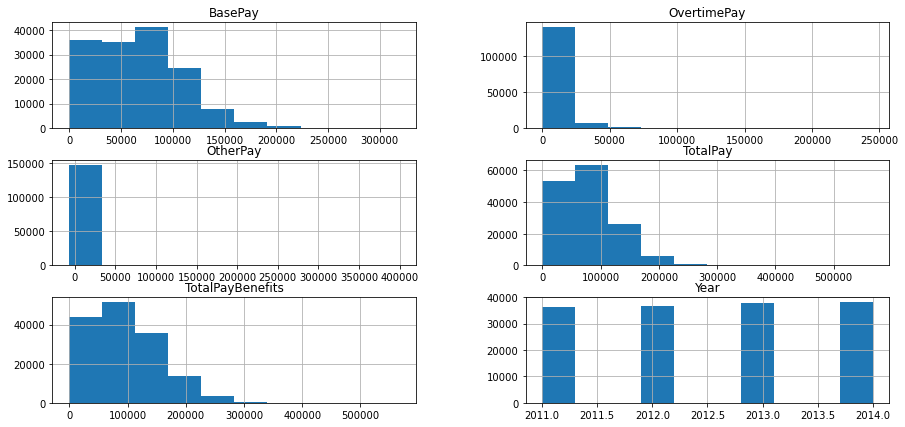

In [32]:
_=df2.hist(figsize=(15,7))

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


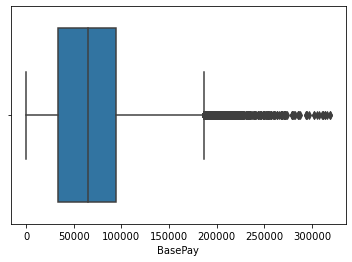

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


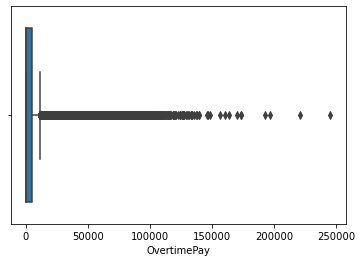

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


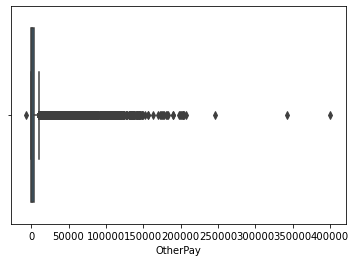

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


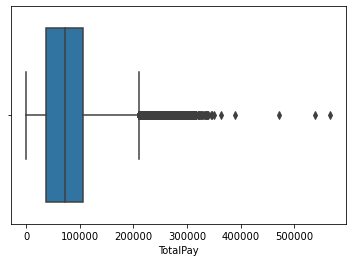

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


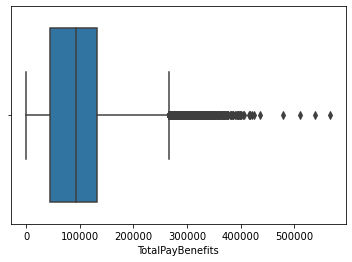

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


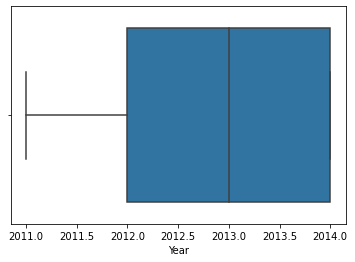

In [61]:
for i in df2.columns:
    sns.boxplot(df2[i])
    plt.show()

Each and every column has outliers

<AxesSubplot:>

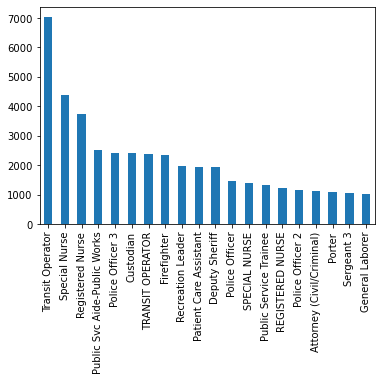

In [81]:
final_data['JobTitle'].value_counts().head(20).plot.bar()

top 20 most common jobs

In [ ]:
sns.scatterplot(df2['TotalPayBenefits'],df2['Year'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BasePay', ylabel='Year'>

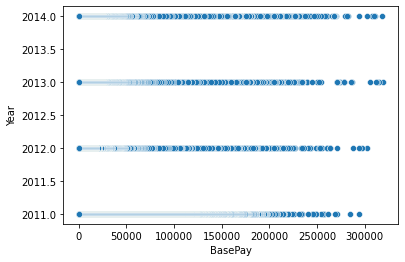

In [49]:
sns.scatterplot(df2['BasePay'],df2['Year'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OvertimePay', ylabel='Year'>

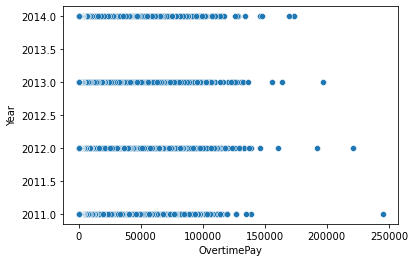

In [50]:
sns.scatterplot(df2['OvertimePay'],df2['Year'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OtherPay', ylabel='Year'>

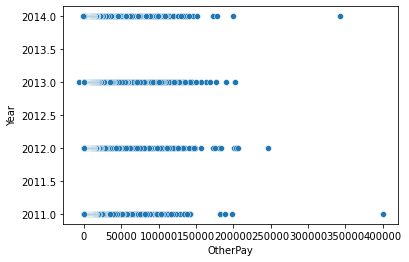

In [51]:
sns.scatterplot(df2['OtherPay'],df2['Year'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalPay', ylabel='Year'>

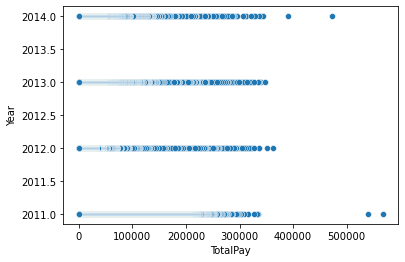

In [52]:
sns.scatterplot(df2['TotalPay'],df2['Year'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


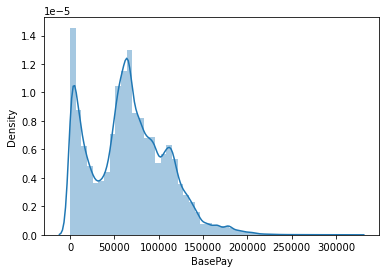

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


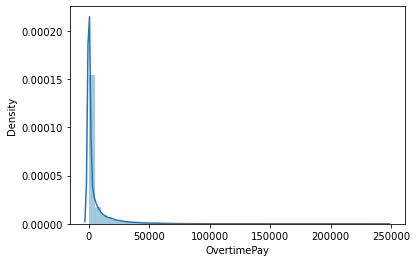

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


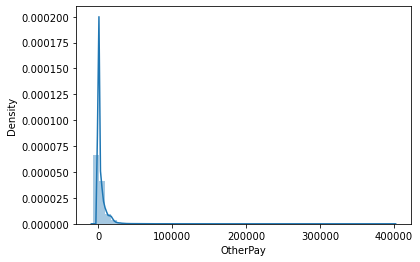

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


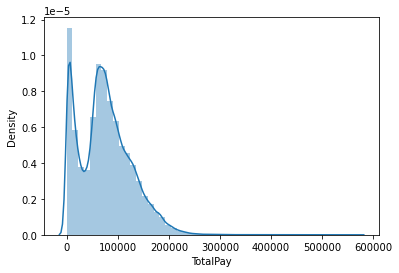

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


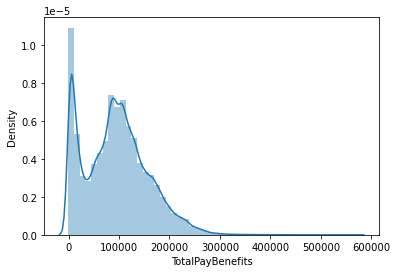

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


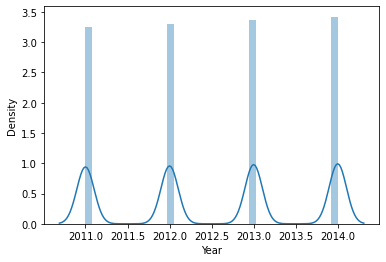

In [62]:
for i in df2.columns:
    sns.distplot(df2[i])
    plt.show()

Data is not notmally distributed

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BasePay', ylabel='TotalPay'>

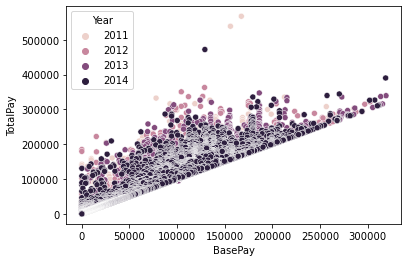

In [64]:
sns.scatterplot(df2['BasePay'],df2['TotalPay'],hue=df2['Year'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalPay', ylabel='TotalPayBenefits'>

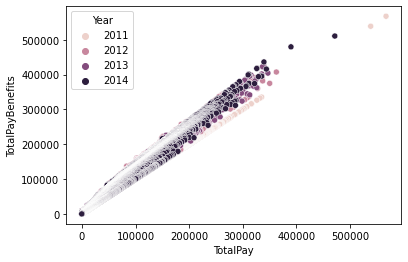

In [65]:
sns.scatterplot(df2['TotalPay'],df2['TotalPayBenefits'],hue=df2['Year'])

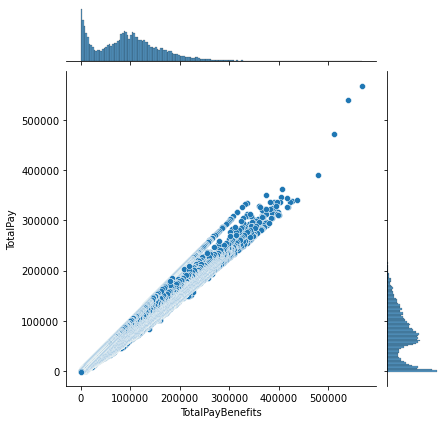

In [91]:
sns.jointplot(x='TotalPayBenefits', y='TotalPay', data=df2, kind = 'scatter')

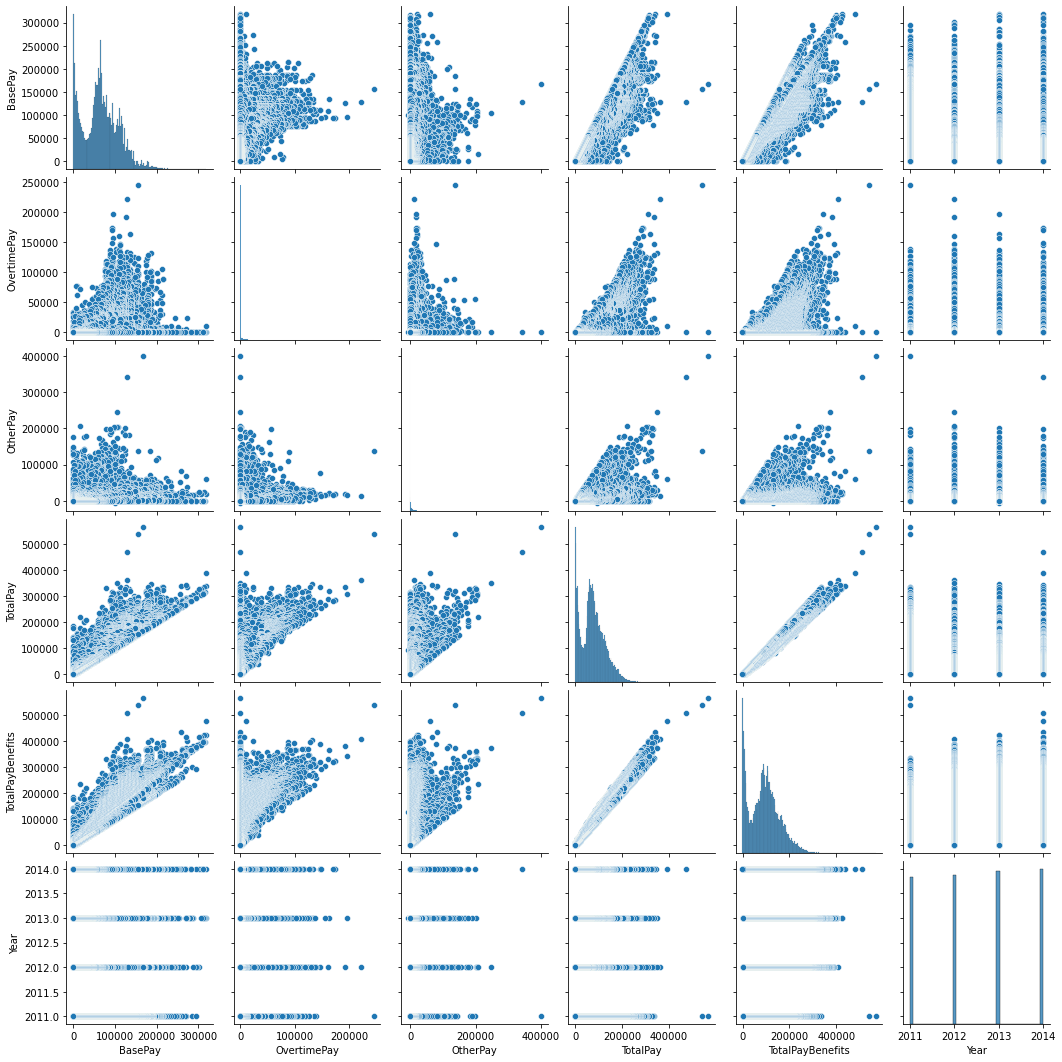

In [88]:
sns.pairplot(final_data)

<AxesSubplot:>

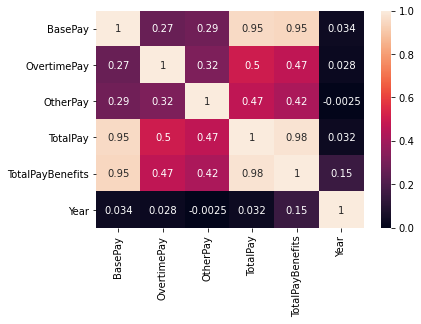

In [70]:
sns.heatmap(final_data.corr(),annot=True)

Total Pay and total pay benefits are highly corelated with Basepay

### Finding Outliers


In [73]:
from collections import Counter

In [74]:
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
      Q1 =df[c].quantile(0.25)
      Q3 =df[c].quantile(0.75)
      IQR = Q3 - Q1
      outlier_list_col =df[(df[c] < (Q1 - 1.5 * IQR)) |(df[c] > (Q3 + 1.5 * IQR))].index
      outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [75]:
o_l=detect_outliers(df2,df2.columns)

In [1]:
print(" No of out liers in data",len(o_l))

NameError: name 'o_l' is not defined